In [26]:
#from numpy import *
#from matplotlib.pyplot import *
from scipy.integrate import *
#import matplotlib.animation as animation
#from JSAnimation import IPython_display
#%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [7]:
def sucesion(cond_ini, epsilon, N=2000, tau=1.):
    cond = np.zeros((N,2))
    cond[0] = cond_ini
    for i in range(1, N):
        cond[i,1] = cond[i-1,1] + epsilon*np.cos(cond[i-1,0])
        cond[i,0] = (cond[i-1,0] + cond[i,1]*tau)%(2*np.pi)
        
    return cond[:,0], cond[:,1]

def mapeo(epsilon, ax, n=200, N=2000, tau=1.):
    for i in range(n):
        cond_ini = np.array([2.0*np.pi*np.random.rand(), np.pi*(np.random.rand()-0.5)])
        x, y = sucesion(cond_ini, epsilon, N, tau)
        ax.plot(x, y, '.', markersize=0.1)
        ax.set_title("$\epsilon = {}$".format(epsilon), fontsize=20)
        ax.set_xlabel("$\\theta$", fontsize=20)
        ax.set_ylabel("$p$", fontsize=20)
        ax.set_xlim(0,2*np.pi)
        ax.set_ylim(-2,2)

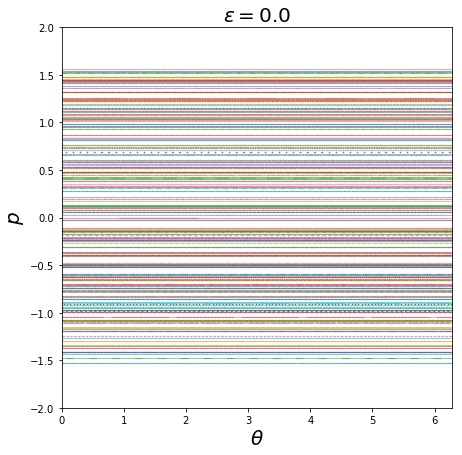

In [8]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
mapeo(0., ax, n=200, N=2000)

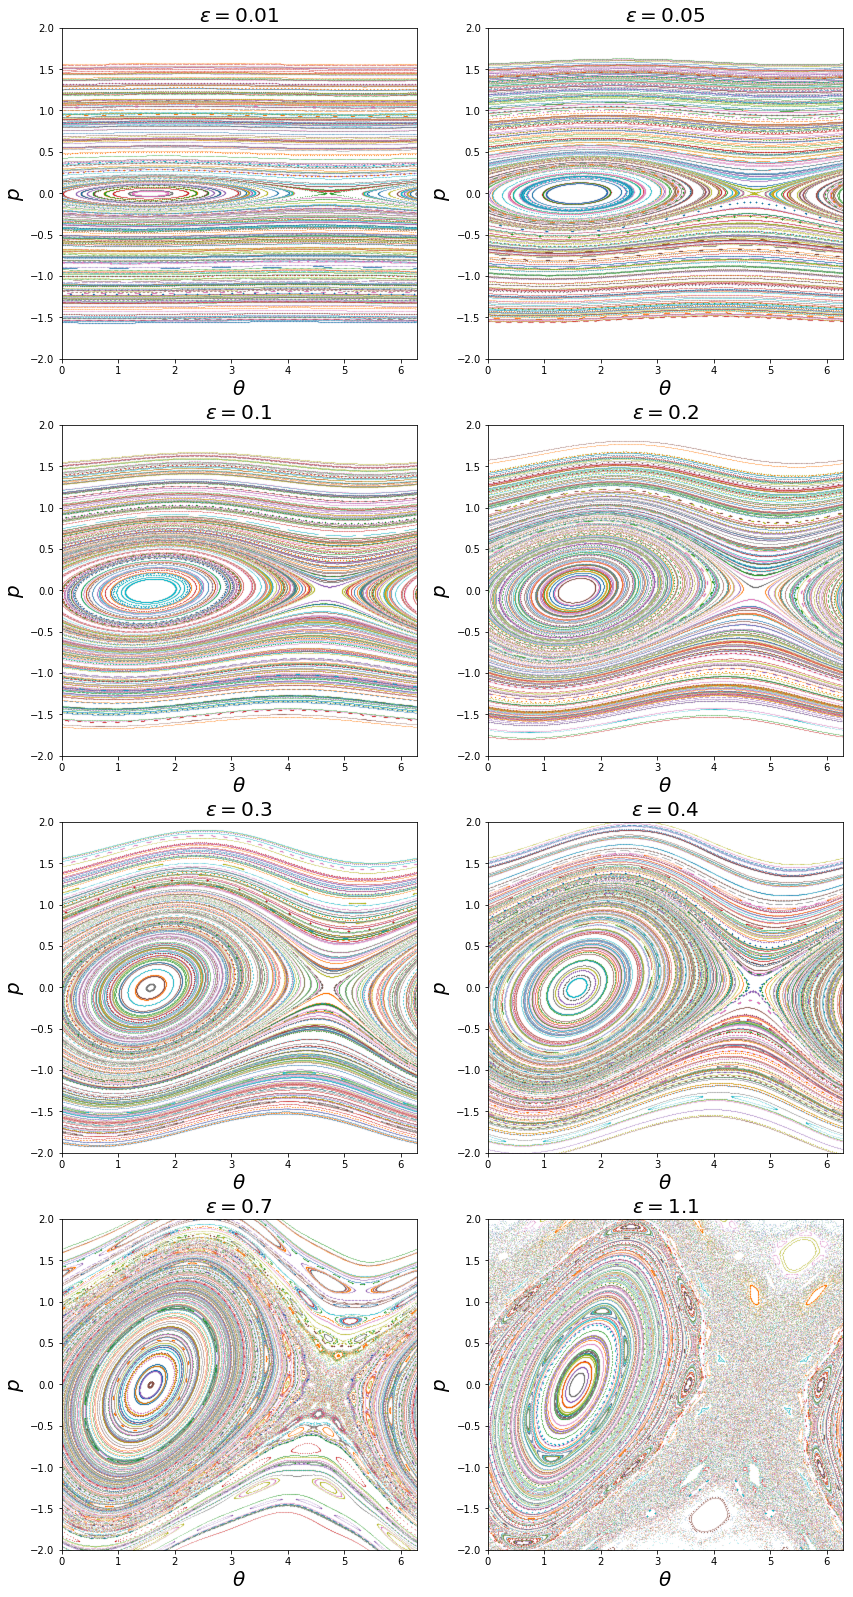

In [9]:
fig, axarr = plt.subplots(4, 2, figsize=(14,28))
eps = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.7, 1.1]
for i in range(4):
    for j in range(2):
        mapeo(eps[i*2+j], axarr[i,j], n=300, N=1000)

Neps = 100
eps = linspace(0.0,5.0, Neps)
n = 400
N = 2000

fig = figure(figsize=(7,7))
ax = fig.add_subplot(111)
ax.set_xlabel("$\\theta$", fontsize=20)
ax.set_ylabel("$p$", fontsize=20)
ax.set_xlim(0,2*pi)
ax.set_ylim(-2,2)
        
mapeoanim, = ax.plot([], [], '.', markersize=0.1)
def init():
    mapeoanim.set_data([], [])
    return mapeoanim,

def animate(i):
    x, y = zeros(n*N), zeros(n*N)
    for j in range(n):
        cond_ini = array([2.0*pi*random.rand(), pi*(random.rand()-0.5)])
        x[N*j:N*(j+1)], y[N*j:N*(j+1)] = sucesion(cond_ini, eps[i], N)
    mapeoanim.set_data(x, y)
    ax.set_title("$\epsilon = {}$".format(eps[i]), fontsize=20)
    return mapeoanim,

animation.FuncAnimation(fig, animate, init_func=init, frames=Neps)

In [27]:
def Energia(x):
    return 0.5*(x[0]**2+x[1]**2+x[2]**2+x[3]**2)+x[1]*x[0]**2-(x[1]**3)/3.

def ec_mov(x,t):
    return np.array([x[2], x[3], -x[0]-2*x[0]*x[1], -x[1]-x[0]**2+x[1]**2])

def root_trayect(func, ptoi, ti, error=1e-5):
    while abs(ptoi[0]) > error:
        tip1 = ti - (ptoi[0]/ptoi[2])
        paso = odeint(func, ptoi, [ti, tip1], atol = 1e-9, rtol= 1e-9)
        ptoi = paso[-1]
    return ptoi

def trayectoria(func, E, t):
    y, py = 0.1*np.random.rand(), np.random.uniform(-0.15,0.15)
    px2 = 2*(E+(1./3.)*y**3-0.5*y**2)-py**2    
    while px2 < 0.0:
        y, py = 0.1*np.random.rand(), np.random.uniform(-0.15,0.15)
        px2 = 2.0*(E+(1./3.)*y**3-0.5*y**2)-py**2
    px = np.sqrt(px2)
    p_ini = np.array([0.0, y, px, py])
    sol = odeint(func, p_ini, t, mxstep=2000, atol=1e-9, rtol=1e-9)
    return sol

def mapeo_poincare(func, E, t): 
    y, px = 0.1*np.random.rand(), np.random.uniform(-0.15,0.15)
    py2 = 2*(E+(1./3.)*y**3-0.5*y**2)-px**2    
    while py2 < 0.0:
        y, px = 0.1*np.random.rand(), np.random.uniform(-0.15,0.15)
        py2 = 2.0*(E+(1./3.)*y**3-0.5*y**2)-px**2
    py = np.sqrt(py2)
    p_ini = np.array([0.0, y, px, py])
    sol = odeint(func, p_ini, t, mxstep=2000, atol=1e-9, rtol=1e-9)
    num = len(t)
    raices, puntos = np.zeros(num), np.zeros((num,4))
    j = 0
    for i in range(num-1):
        if sol[i][0]*sol[i+1][0] < 0.0:
            puntos[j] = root_trayect(func, sol[i], t[i], error=1e-5)
            j += 1
    puntos = puntos[0:j]
    return puntos

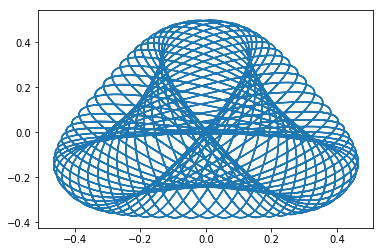

In [29]:
t = np.linspace(0,500,10000)
E = 0.1
sol = trayectoria(ec_mov, E, t)

plt.plot(sol[:,0], sol[:,1]);

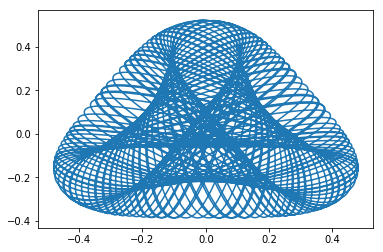

In [32]:
t = np.linspace(0,500,10000)
E = 0.1
sol = trayectoria(ec_mov, E, t)

plt.plot(sol[:,0], sol[:,1]);

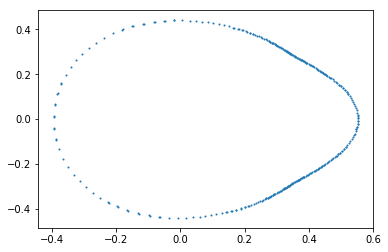

In [33]:
t = np.linspace(0,1000,10000)
E = 0.1
puntos = mapeo_poincare(ec_mov, E, t)

plt.plot(puntos[:,1], puntos[:,3],'.',markersize=2);

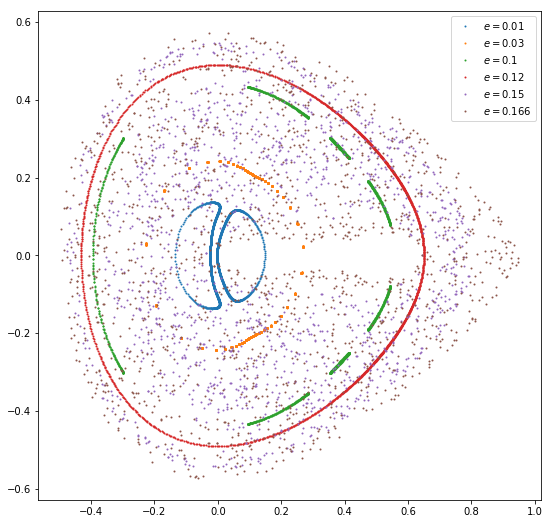

In [36]:
t = np.linspace(0, 5000, 15000)
E = np.array([0.01, 0.03, 0.1, 0.12, 0.15, 0.166])

plt.figure(figsize=(9,9))
for e in E:
    #print (e)
    puntos = mapeo_poincare(ec_mov, e, t)
    plt.plot(puntos[:,1], puntos[:,3],'.', markersize=2, label="$e={}$".format(e))
plt.legend()
plt.show()